In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import bqplot as bq
import numpy as np
import seaborn as sns

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/licenses_fall2022.csv')
df.head()

,_id,License Type,Description,License Number,License Status,Business,Title,First Name,Middle,Last Name,...,Specialty/Qualifier,Controlled Substance Schedule,Delegated Controlled Substance Schedule,Ever Disciplined,LastModifiedDate,Case Number,Action,Discipline Start Date,Discipline End Date,Discipline Reason
0,1189509,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129446286,NOT RENEWED,N,NaN,EILEEN,NaN,SANTACRUZ,...,None,None,None,N,03/18/2022,None,None,None,None,None
1,801037,DETECTIVE BOARD,FIREARM CONTROL CARD,229030294.0,NOT RENEWED,N,NaN,DAGMAR,J,NORDLUND,...,None,None,None,N,08/16/2006,None,None,None,None,None
2,365129,COSMO,LICENSED COSMETOLOGIST,11053076.0,NOT RENEWED,N,NaN,RADOJE,NaN,ZELENOVIC,...,None,None,None,N,05/26/2006,None,None,None,None,None
3,595427,COSMO,LICENSED COSMETOLOGIST,11295645.0,ACTIVE,N,NaN,BECKY SUE,L,BURROUGHS,...,None,None,None,N,11/12/2021,None,None,None,None,None
4,653668,COSMO,LICENSED NAIL TECHNICIAN,169006247,NOT RENEWED,N,NaN,BILL G,L,LETNER,...,None,None,None,N,05/30/2006,None,None,None,None,None


In [48]:
df['Original Issue Date'] = pd.to_datetime(df['Original Issue Date'],
                                            format='%m/%d/%Y',
                                            errors='coerce')

In [49]:
df['Expiration Date'] = pd.to_datetime(df['Original Issue Date'],
                                            format='%m/%d/%Y',
                                            errors='coerce')

In [50]:
df['Effective Date'] = pd.to_datetime(df['Original Issue Date'],
                                            format='%m/%d/%Y',
                                            errors='coerce')

In [51]:
df['Original Issue Year'] = df['Original Issue Date'].dt.year
df['Original Issue Year']

0       2020.0
1       1995.0
2       1945.0
3       2011.0
4       1995.0
         ...  
9995    1987.0
9996    1989.0
9997    1966.0
9998    1983.0
9999    2008.0
Name: Original Issue Year, Length: 10000, dtype: float64

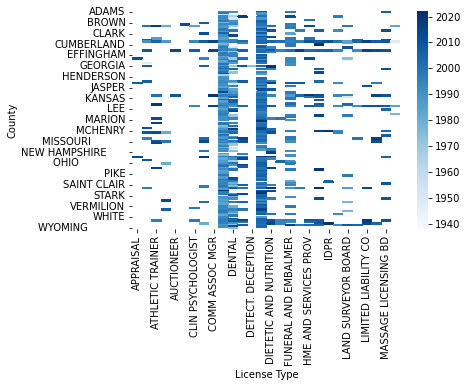

In [68]:
df_heatmap_mean = df.pivot_table(values='Original Issue Year', 
                                 index='County', 
                                 columns='License Type', 
                                 aggfunc='mean')

sns.heatmap(df_heatmap_mean, cmap='Blues')

In [70]:
df_heatmap_mean = df.groupby(['County', 'License Type']).agg({'Effective Date': 'min', 'Expiration Date': 'max'})
df_heatmap_mean['Days Between'] = (df_heatmap_mean['Expiration Date'] - df_heatmap_mean['Effective Date']).dt.days.mean(level='County')
df_heatmap_mean = df_heatmap_mean.reset_index()
df_heatmap_mean.set_index(['County', 'License Type'], inplace=True)

x_sc = bq.OrdinalScale()
y_sc = bq.OrdinalScale()
color_sc = bq.ColorScale(scheme='Blues')

heatmap_mark = bq.GridHeatMap(color=df_heatmap_mean['Days Between'].values.reshape(-1, 1),
                              row=df_heatmap_mean.index.get_level_values('County').unique(),
                              column=df_heatmap_mean.index.get_level_values('License Type').unique(),
                              scales={'row': y_sc, 'column': x_sc, 'color': color_sc},
                              interactions={'click': 'select'})

selector = bq.interacts.FastIntervalSelector(marks=[heatmap_mark])
heatmap_mark.interactions = {'click': 'select'}

heatmap_fig = bq.Figure(marks=[heatmap_mark], title='Mean Days Between Effective Date and Expiration Date by County and License Type', padding_y=0)
heatmap_fig.interaction = selector
heatmap_fig

TraitError: row must be an array of size color.shape[0]

While creating this heat map, I had a lot of troubles with various types of errors. Including issues with the NaN variables, object to numeric conversion issues (which I think I mostly solved), and then the row must be an array of size color shape. I was able to conver the date data similar to hw3. I then grouped the rows and columns based on difference of effective and expiration date, and looked at the license types. I was able to visualize this and ran into futher problems when attempting to create the interactive portion. Used df = df.isna() to remove NA values, but sometimes too many NaN values would be removed. 

In [74]:
#heatmap = bq.interacts.GridHeatMap(heatmap_fig)
heatmap.observe(update_bar_chart, 'selected')
dashboard = widgets.HBox([heatmap, bar_chart])

display(dashboard)

NameError: name 'heatmap' is not defined

I plan on going over this again, and coming through office hours to get this fixed up. I used an extension so wanted to turn in to get as much partial credit as I could. Debugging was a problem and took me a while to figure out what was the issue, and I eventually couldn't figure out the solution.